In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [6]:
df = pd.read_csv("bank-additional.csv",delimiter=';')
df.rename(columns={'y':'deposit'}, inplace=True)
df=df.head(2680)
print(df.head())

   age          job  marital          education default  housing     loan  \
0   30  blue-collar  married           basic.9y      no      yes       no   
1   39     services   single        high.school      no       no       no   
2   25     services  married        high.school      no      yes       no   
3   38     services  married           basic.9y      no  unknown  unknown   
4   47       admin.  married  university.degree      no      yes       no   

     contact month day_of_week  ...  campaign  pdays  previous     poutcome  \
0   cellular   may         fri  ...         2    999         0  nonexistent   
1  telephone   may         fri  ...         4    999         0  nonexistent   
2  telephone   jun         wed  ...         1    999         0  nonexistent   
3  telephone   jun         fri  ...         3    999         0  nonexistent   
4   cellular   nov         mon  ...         1    999         0  nonexistent   

  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.e

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2680 entries, 0 to 2679
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2680 non-null   int64  
 1   job             2680 non-null   object 
 2   marital         2680 non-null   object 
 3   education       2680 non-null   object 
 4   default         2680 non-null   object 
 5   housing         2680 non-null   object 
 6   loan            2680 non-null   object 
 7   contact         2680 non-null   object 
 8   month           2680 non-null   object 
 9   day_of_week     2680 non-null   object 
 10  duration        2680 non-null   int64  
 11  campaign        2680 non-null   int64  
 12  pdays           2680 non-null   int64  
 13  previous        2680 non-null   int64  
 14  poutcome        2680 non-null   object 
 15  emp.var.rate    2680 non-null   float64
 16  cons.price.idx  2680 non-null   float64
 17  cons.conf.idx   2680 non-null   f

In [8]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,deposit
2675,24,services,married,high.school,no,yes,no,telephone,jun,mon,...,6,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,no
2676,41,services,married,high.school,unknown,yes,yes,telephone,jun,tue,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1,no
2677,22,services,single,high.school,no,yes,no,telephone,jun,mon,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,no
2678,28,self-employed,single,university.degree,no,no,no,cellular,jun,mon,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.266,5076.2,no
2679,41,admin.,married,basic.9y,no,yes,no,telephone,jul,wed,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no


In [9]:
df.shape

(2680, 21)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [11]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
deposit            object
dtype: object

In [12]:
df.dtypes.value_counts()

object     11
int64       5
float64     5
Name: count, dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
deposit           0
dtype: int64

In [15]:
cat_cols = df.select_dtypes(include='object').columns
print(cat_cols)

num_cols = df.select_dtypes(exclude='object').columns
print(num_cols)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [16]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000,2680.000000
mean,39.854851,254.565299,2.535448,961.185448,0.195522,0.087799,93.586836,-40.556567,3.615704,5166.034590
std,10.265613,256.896132,2.578273,190.144593,0.560470,1.560394,0.580140,4.596169,1.738120,74.134514
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000
25%,32.000000,101.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000
50%,38.000000,178.000000,2.000000,999.000000,0.000000,1.100000,93.897000,-41.800000,4.857000,5191.000000
75%,47.000000,316.250000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [17]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,deposit
count,2680,2680,2680,2680,2680,2680,2680,2680,2680,2680,2680
unique,12,4,7,2,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,mon,nonexistent,no
freq,667,1628,828,2140,1420,2187,1726,915,560,2290,2388


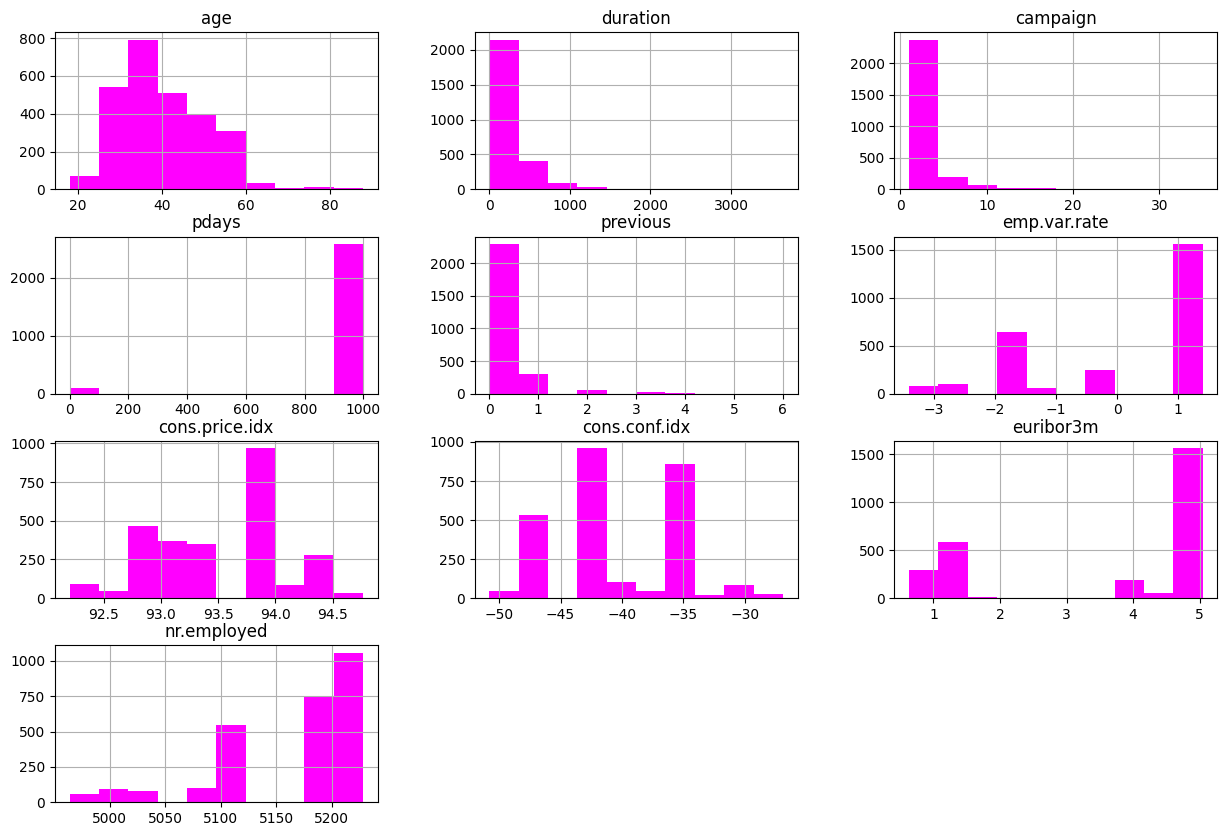

In [19]:
df.hist(figsize=(15,10),color='#FF00FF')
plt.show()

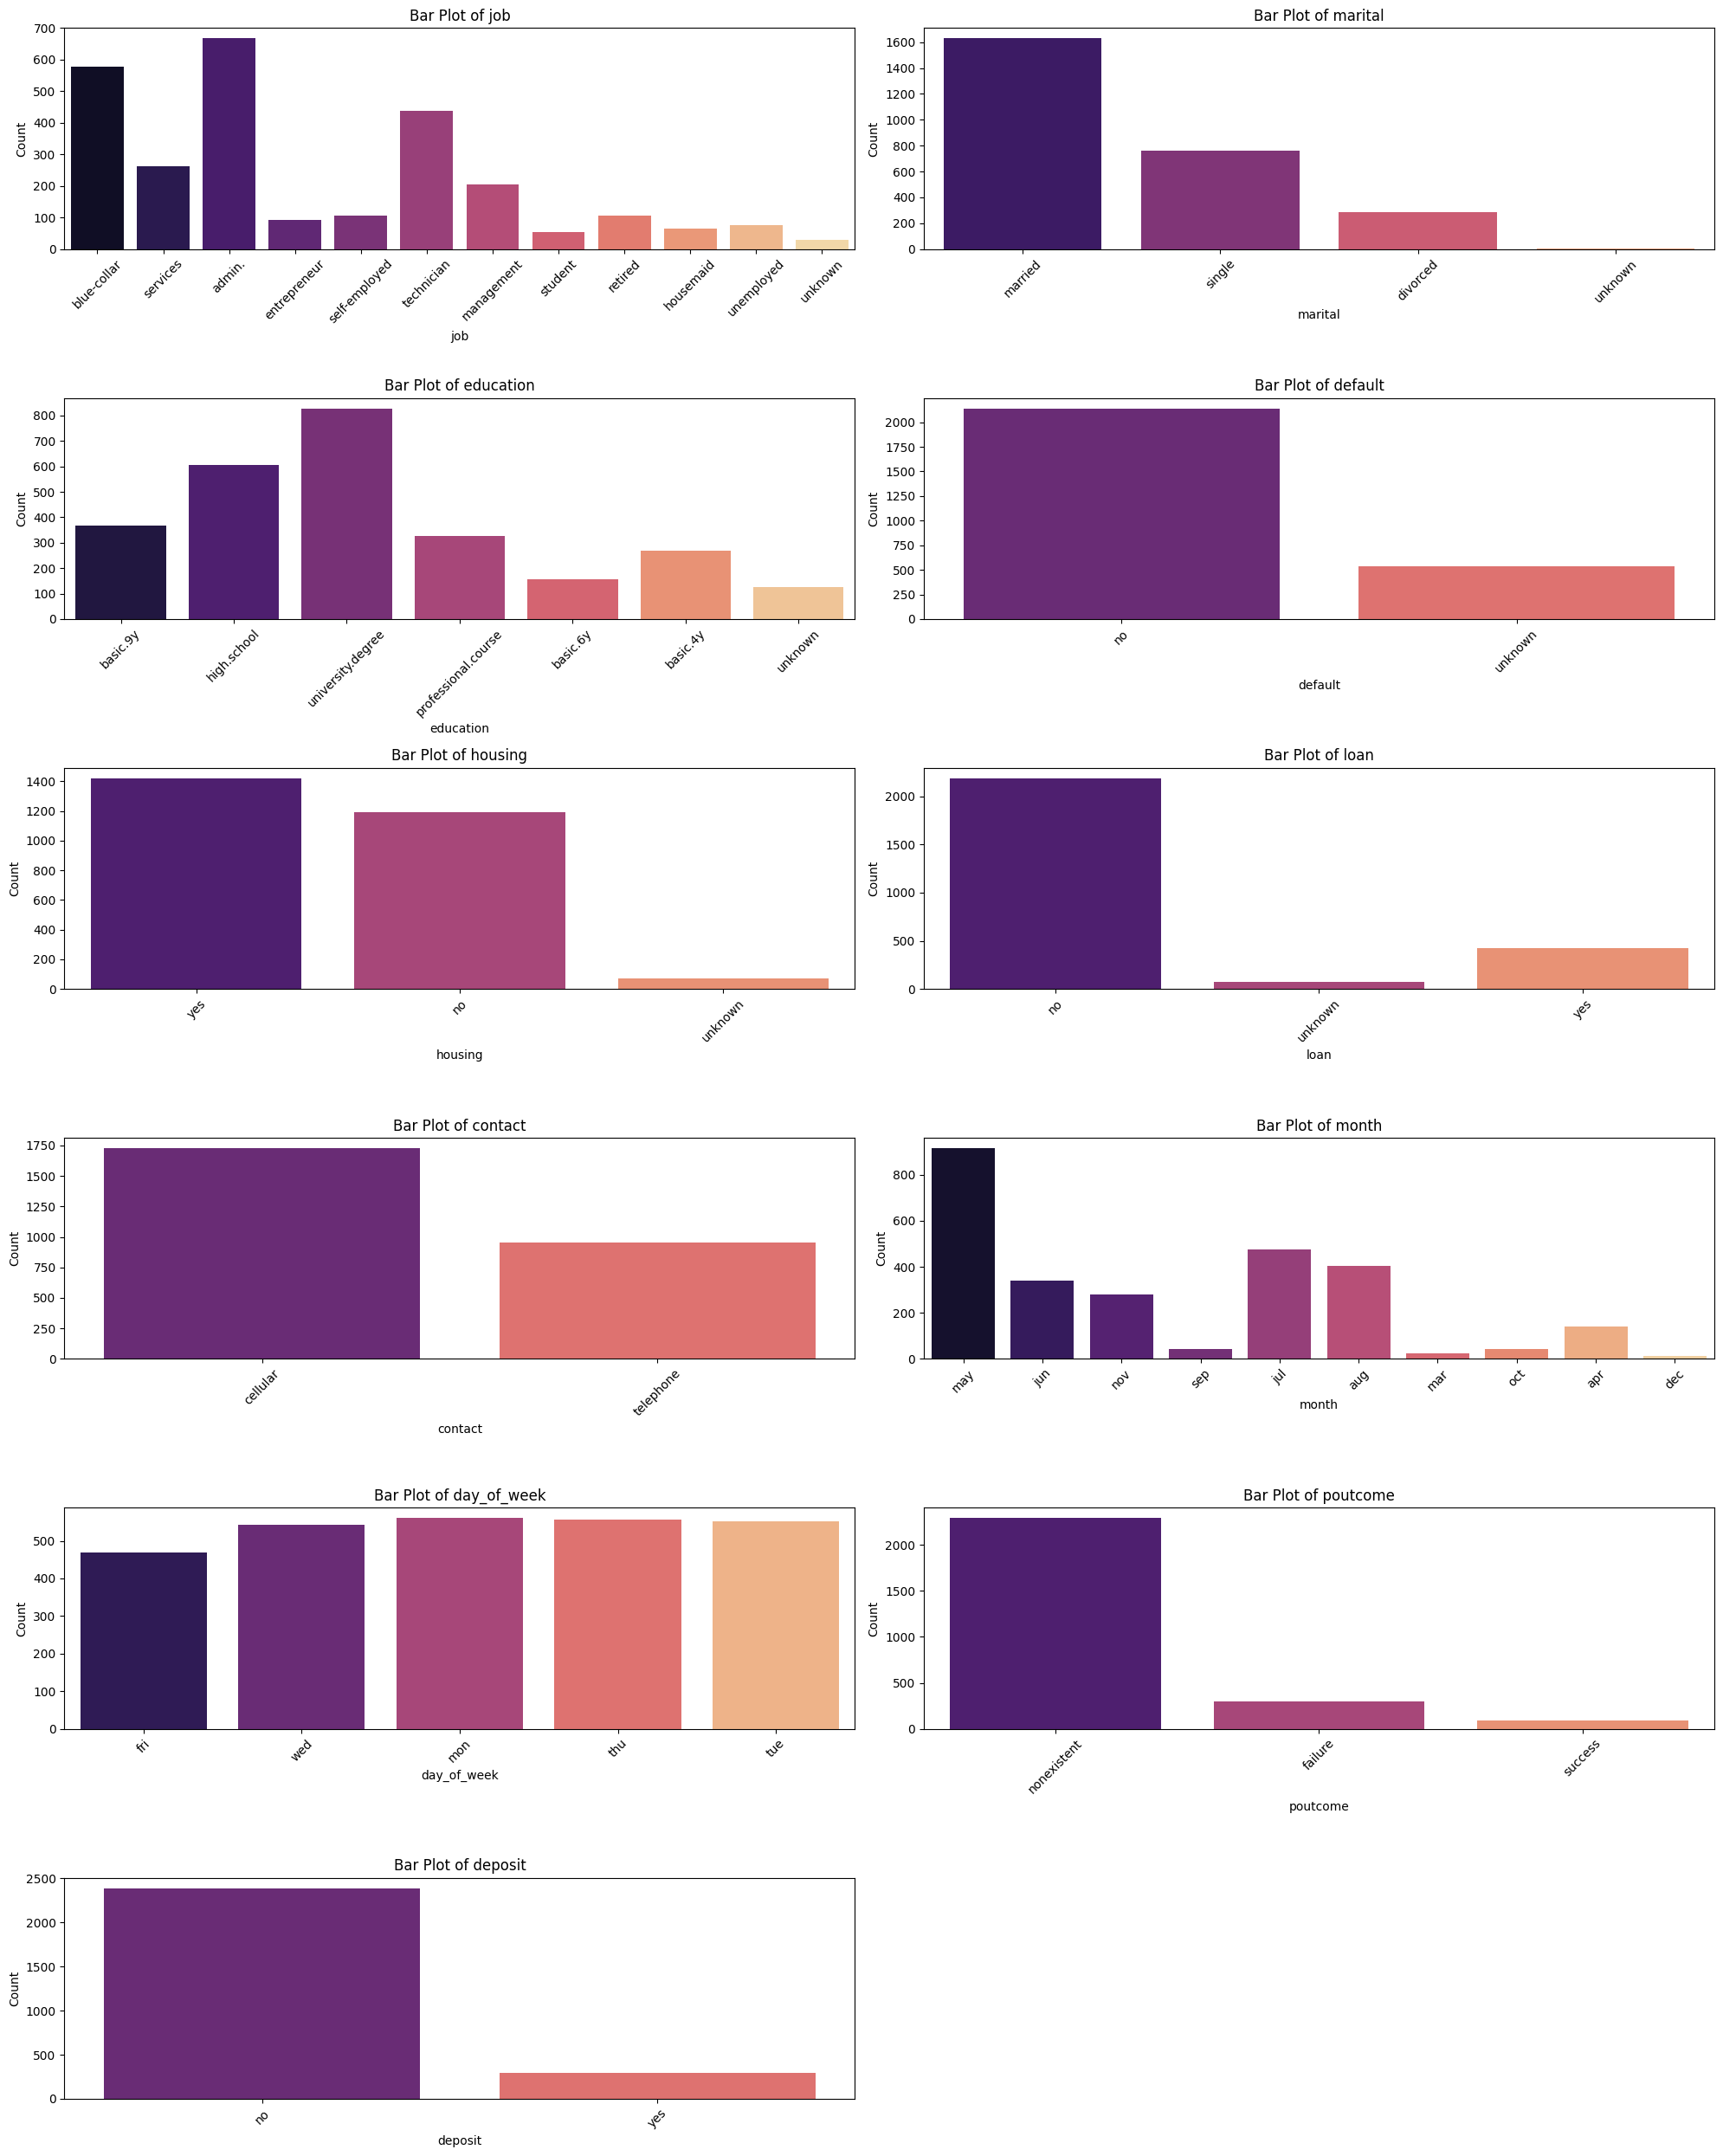

In [21]:
num_plots = len(cat_cols)
num_rows = (num_plots + 1) // 2  
num_cols = 2

plt.figure(figsize=(20, 25)) 

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=feature, data=df, palette='magma')
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

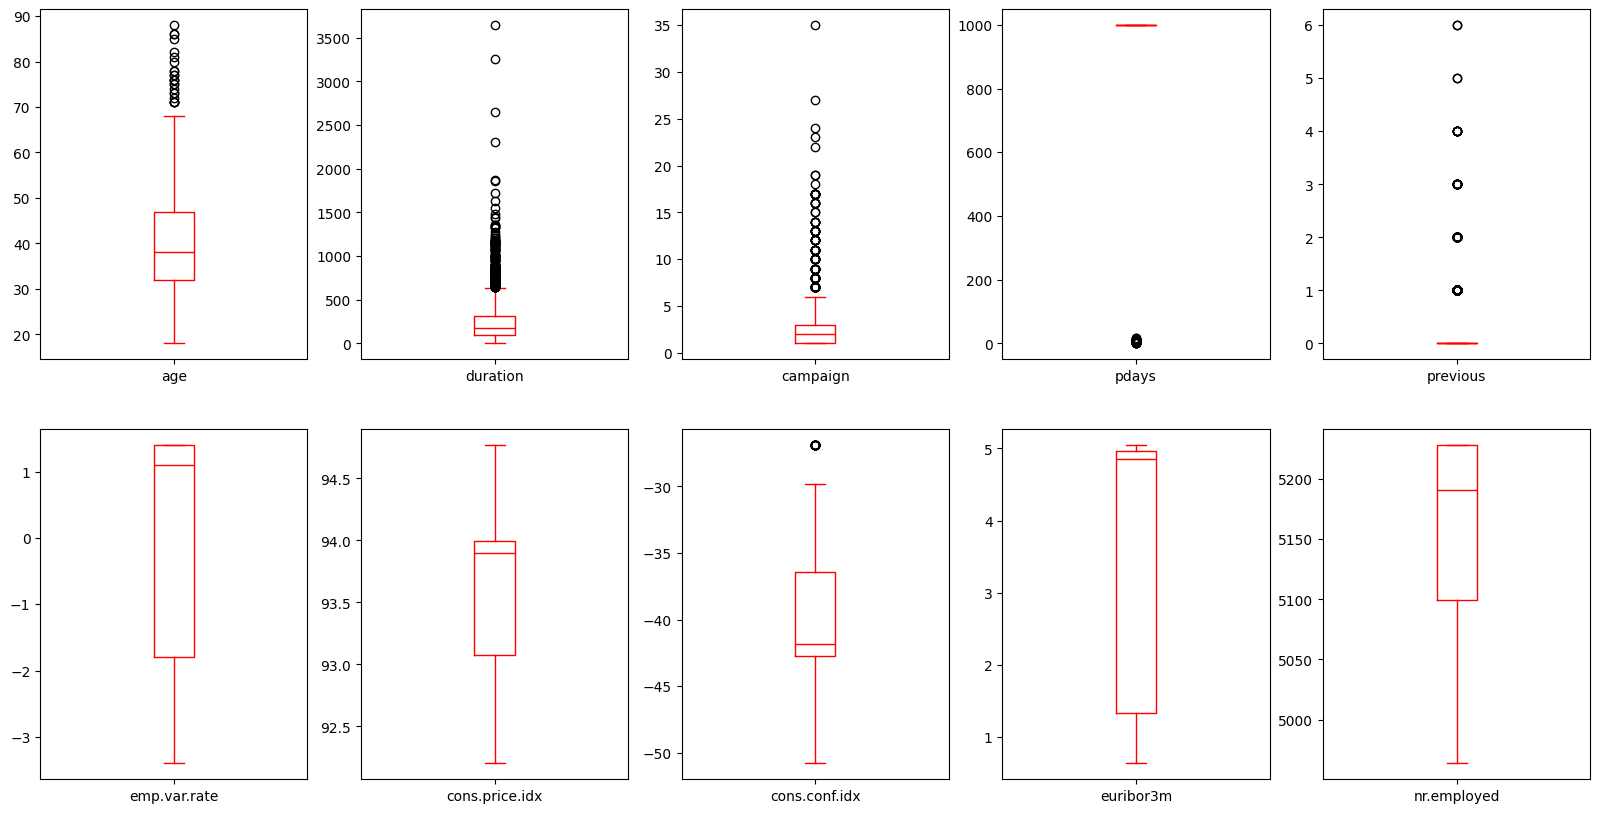

In [22]:
df.plot(kind='box', subplots=True, layout=(2,5),figsize=(20,10),color='#FF0000')
plt.show()

In [23]:
column = df[['age','campaign','duration']]
q1 = np.percentile(column, 25)
q3 = np.percentile(column, 75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df[['age','campaign','duration']] = column[(column > lower_bound) & (column < upper_bound)]

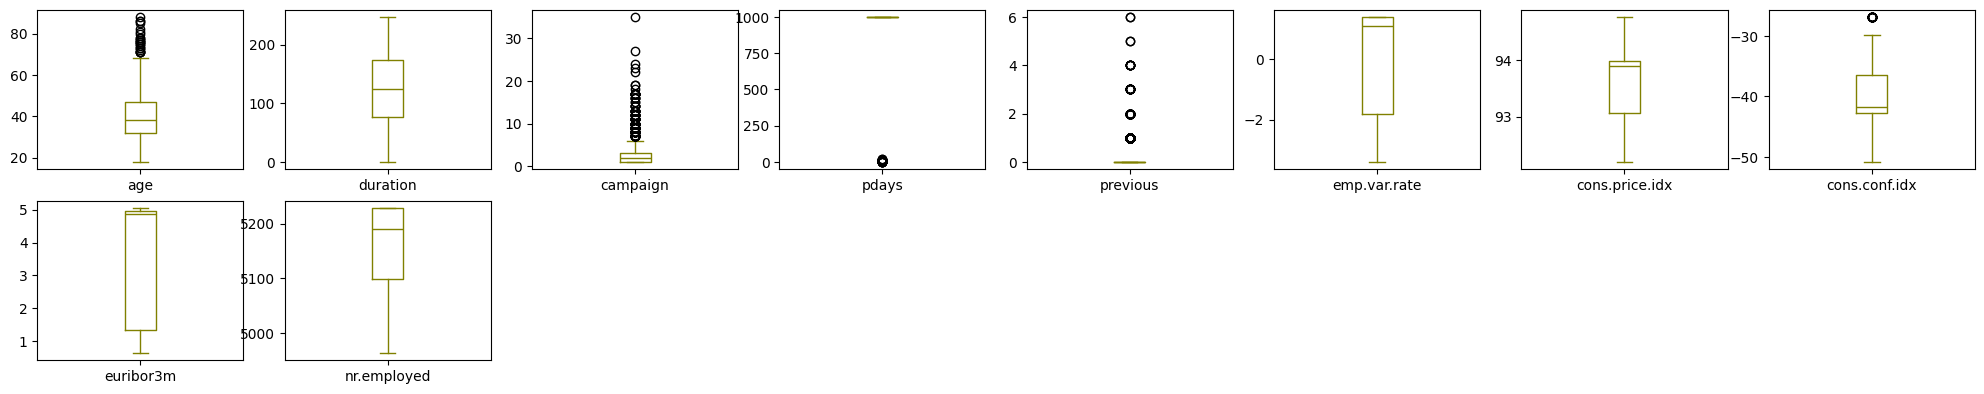

In [24]:
df.plot(kind='box', subplots=True, layout=(5,8),figsize=(25,12),color='#808000')
plt.show()

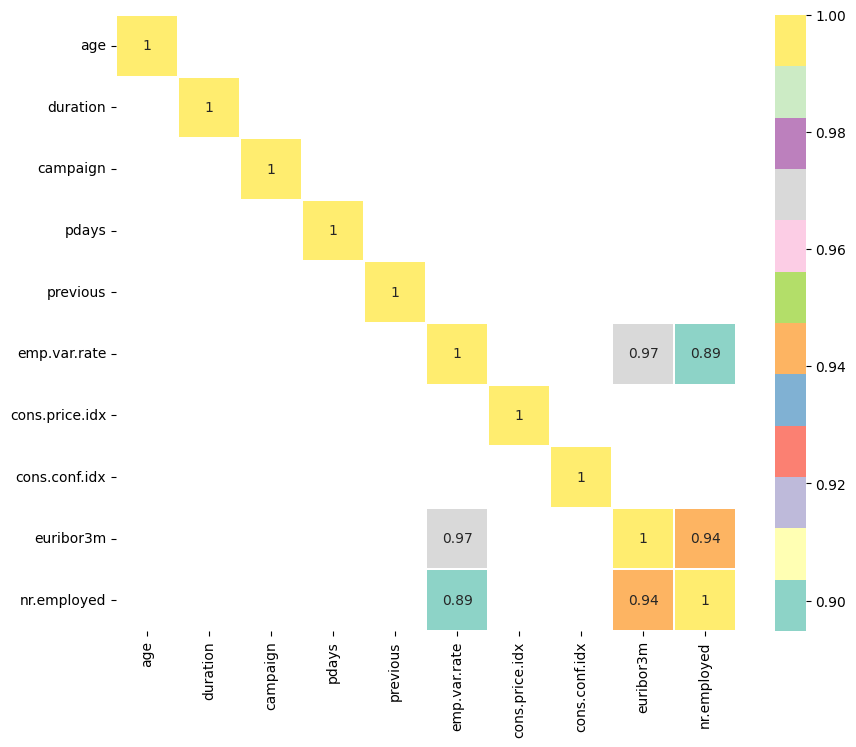

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.drop(columns=cat_cols)
corr = numeric_df.corr()

corr = corr[abs(corr) >= 0.80]

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='Set3', linewidths=0.2)
plt.show()


In [27]:
high_corr_cols = ['emp.var.rate','euribor3m','nr.employed']

In [28]:
df1 = df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit'],
      dtype='object')

In [29]:
df1.drop(high_corr_cols,inplace=True,axis=1)  # axis=1 indicates columns
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx', 'deposit'],
      dtype='object')

In [30]:
df1.shape

(2680, 18)

In [31]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_encoded = df1.apply(lb.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,deposit
0,12,1,1,2,0,2,0,0,6,0,245,1,13,0,1,8,4,0
1,21,7,2,3,0,0,0,1,6,0,245,3,13,0,1,18,16,0
2,7,7,1,3,0,2,0,1,4,4,224,0,13,0,1,23,8,0
3,20,7,1,2,0,1,1,1,4,0,14,2,13,0,1,23,8,0
4,29,0,1,5,0,2,0,0,7,1,55,0,13,0,1,11,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2675,6,7,1,3,0,2,0,1,4,1,245,5,13,0,1,23,8,0
2676,23,7,1,3,1,2,2,1,4,3,28,0,13,0,1,23,8,0
2677,4,7,2,3,0,2,0,1,4,1,91,1,13,0,1,9,9,0
2678,10,6,2,5,0,0,0,0,4,1,245,1,13,0,1,9,9,0


In [32]:
df_encoded['deposit'].value_counts()

deposit
0    2388
1     292
Name: count, dtype: int64

In [33]:
x = df_encoded.drop('deposit',axis=1)  
y = df_encoded['deposit']              
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(2680, 17)
(2680,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2010, 17)
(670, 17)
(2010,)
(670,)


In [35]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc = accuracy_score(y_test,y_pred)
    print('Accuracy_Score',acc)
    cm = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix\n',cm)
    print('Classification Report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score = model.score(x_train,y_train)
    test_score = model.score(x_test,y_test)
    print('Training Score',train_score)  
    print('Testing Score',test_score)

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [37]:
mscore(dt)

Training Score 0.9208955223880597
Testing Score 0.9119402985074627


In [38]:
ypred_dt = dt.predict(x_test)
print(ypred_dt)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 

In [39]:
eval_model(y_test,ypred_dt)

Accuracy_Score 0.9119402985074627
Confusion Matrix
 [[593   5]
 [ 54  18]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       598
           1       0.78      0.25      0.38        72

    accuracy                           0.91       670
   macro avg       0.85      0.62      0.67       670
weighted avg       0.90      0.91      0.89       670



Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx'],
      dtype='object')
['no', 'yes']


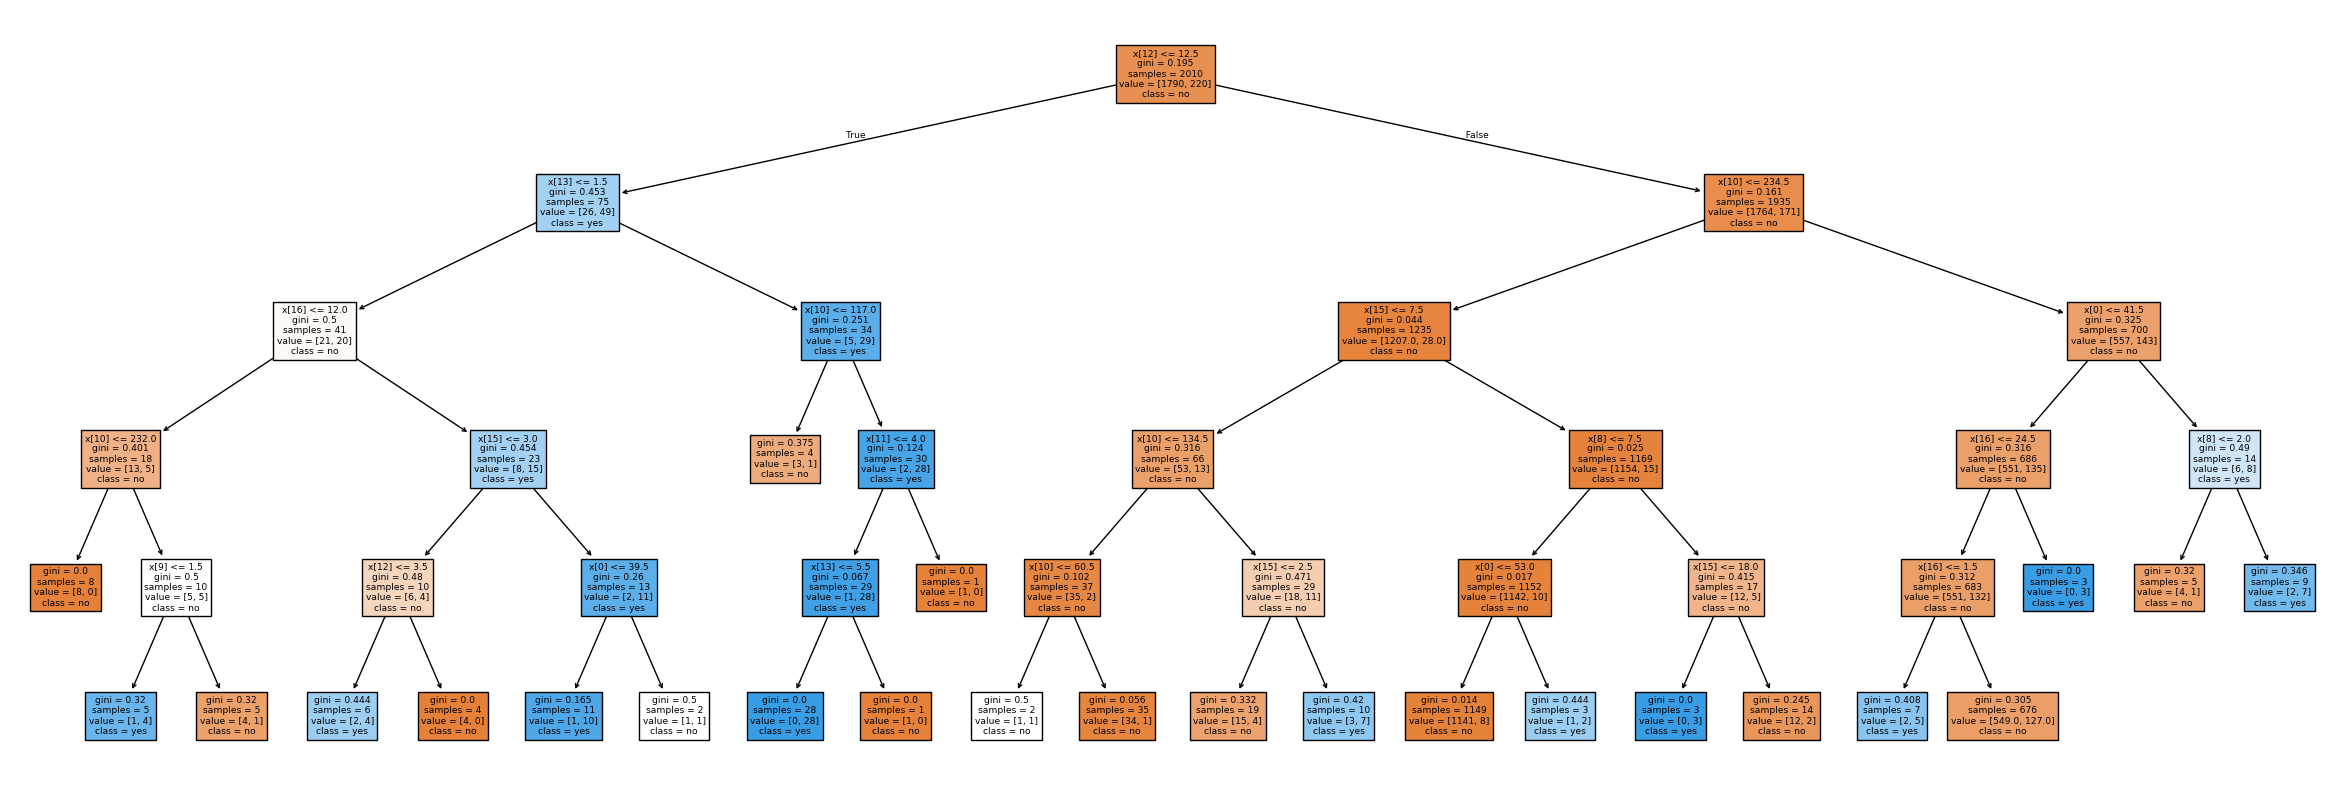

In [40]:
from sklearn.tree import plot_tree
cn = ['no','yes']
fn = x_train.columns
print(fn)
print(cn)
plt.figure(figsize=(30,10))
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [41]:
dt1 = DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [42]:
mscore(dt1)

Training Score 0.9134328358208955
Testing Score 0.9164179104477612


In [43]:
ypred_dt1 = dt1.predict(x_test)
eval_model(y_test,ypred_dt1)

Accuracy_Score 0.9164179104477612
Confusion Matrix
 [[593   5]
 [ 51  21]]
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       598
           1       0.81      0.29      0.43        72

    accuracy                           0.92       670
   macro avg       0.86      0.64      0.69       670
weighted avg       0.91      0.92      0.90       670



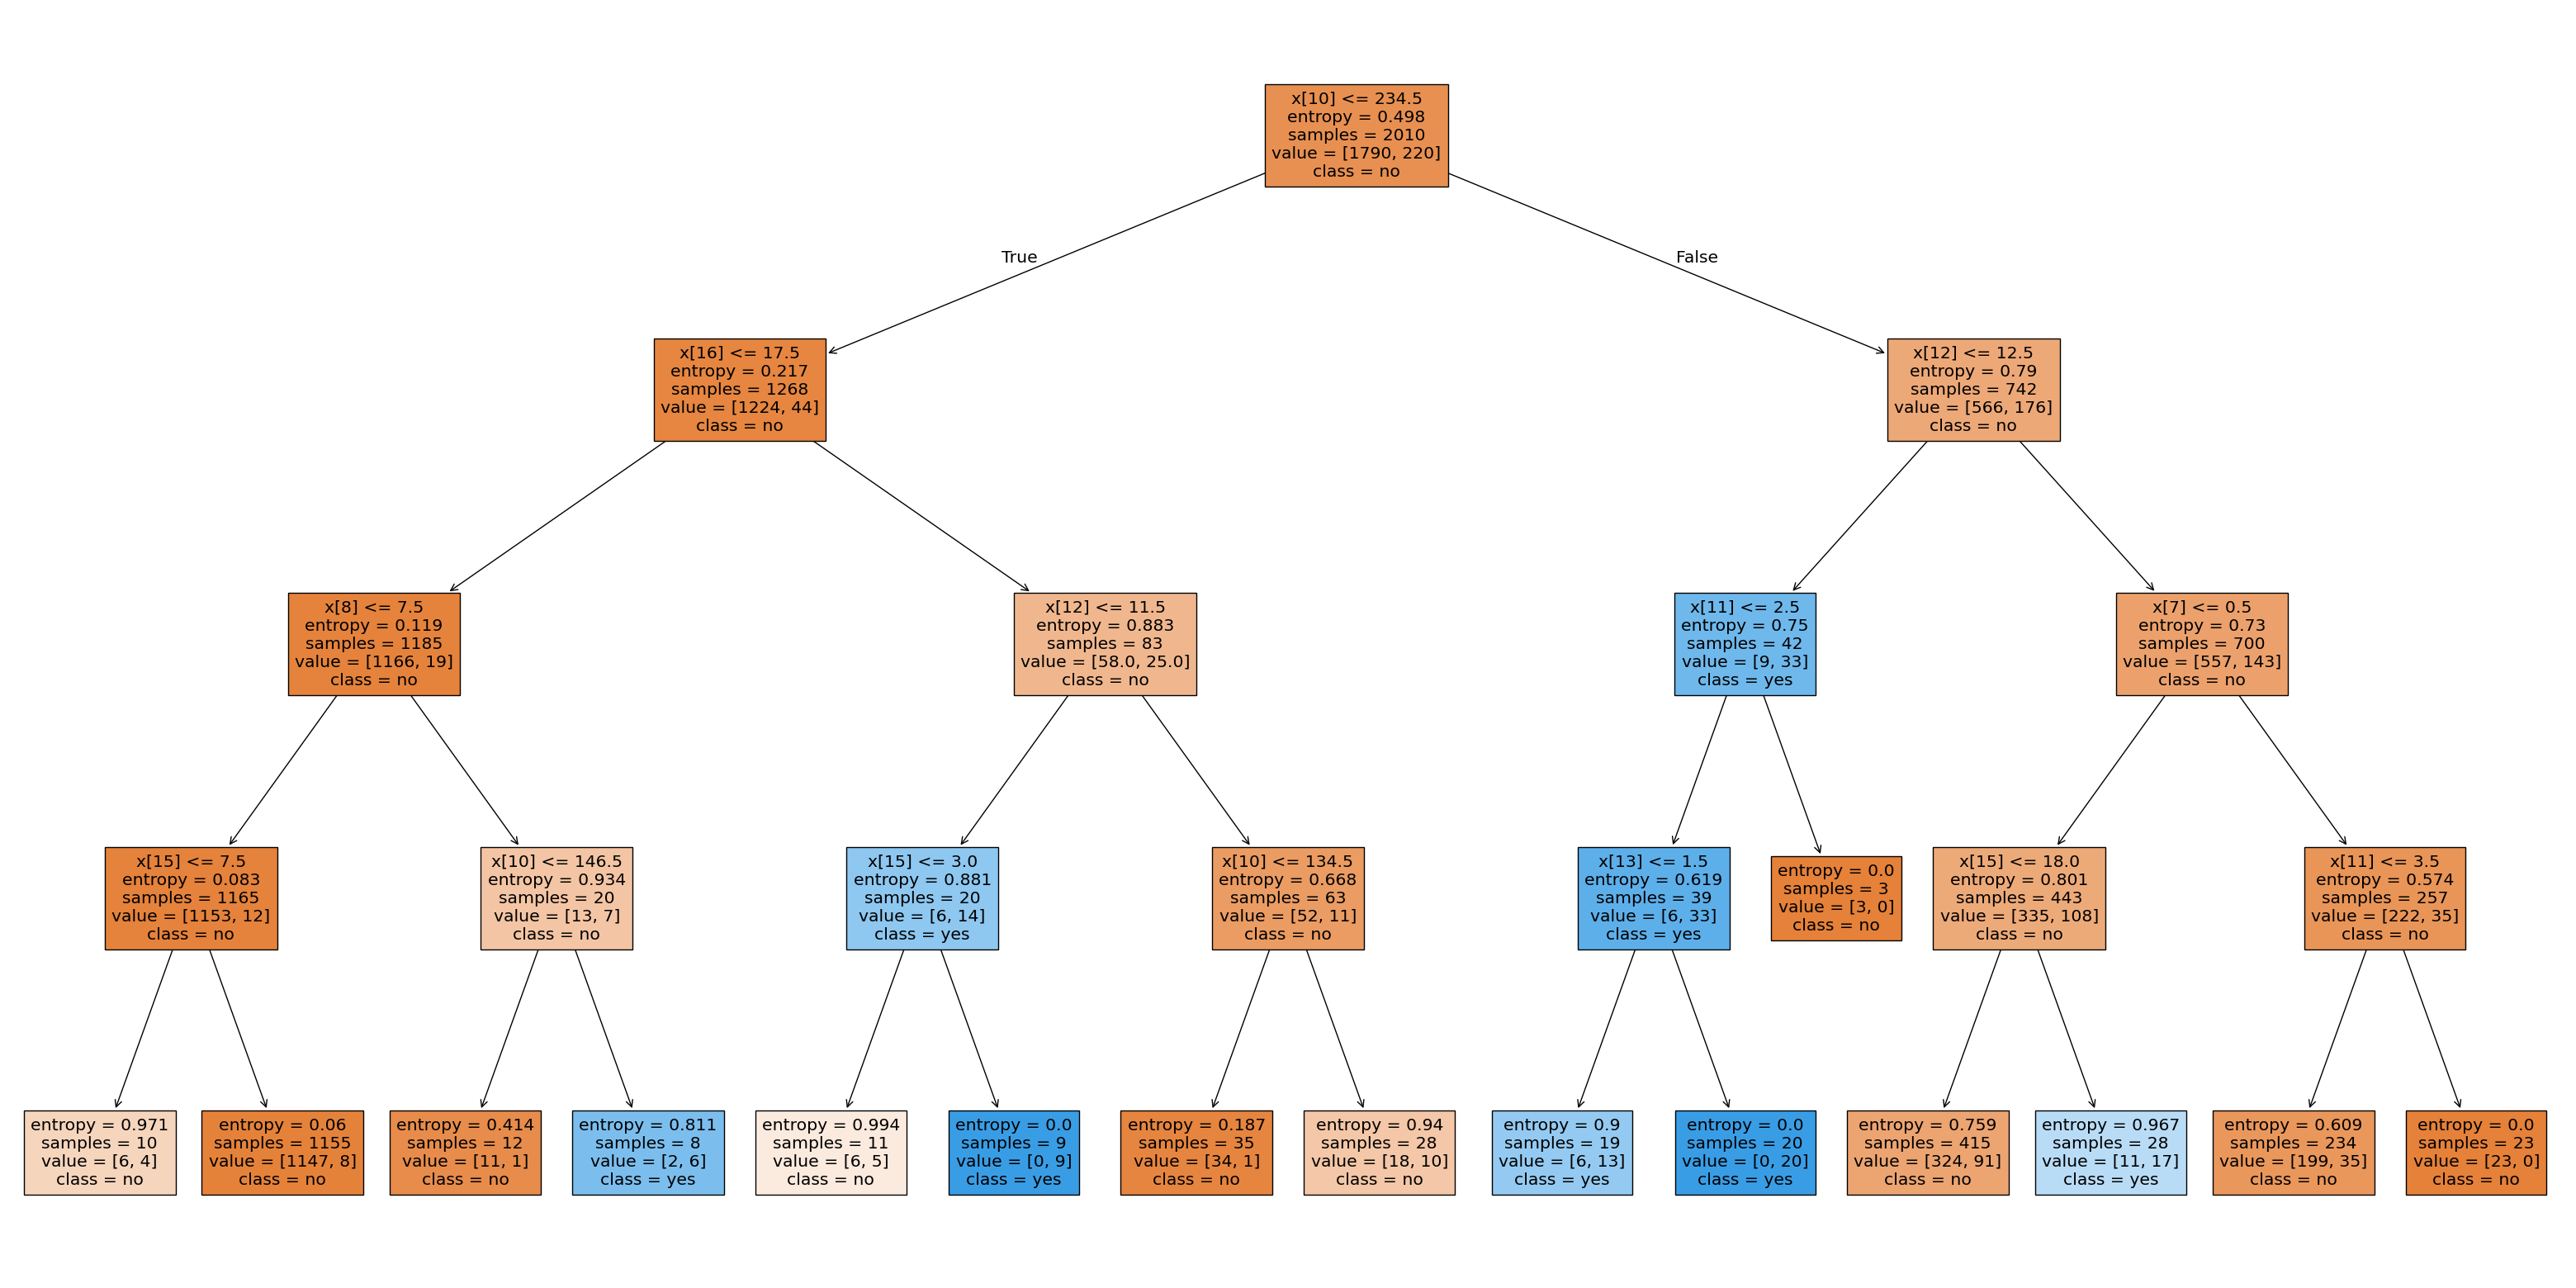

In [44]:
plt.figure(figsize=(40,20))
plot_tree(dt1,class_names=cn,filled=True)
plt.show()